In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(reshape2)
library(microbiomeutilities)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.9     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked fro

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

In [3]:
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")

head(taxa_16S)

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


Feature.ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
000967513bd1d4cb51b4ae7afbeed4dc,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Acanthopleuribacterales,f__Acanthopleuribacteraceae,g__Acanthopleuribacter,s__uncultured_bacterium,ASV_1
0012e79eda7972a4a12492475df662bd,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__Aquimarina,s__Aquimarina_salinaria,ASV_2
001f7fb00fb7754df232a1d66e219565,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingorhabdus,NA,ASV_3
0026003a1d59f9f99ad87f00257ee192,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Micavibrionales,f__uncultured,g__uncultured,s__uncultured_bacterium,ASV_4
0031b7578aa4158302744105e9c463ed,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Alteromonadaceae,g__uncultured,s__uncultured_marine,ASV_5
003b6df8106c04e650b4d51c08ce03b7,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Nitrincolaceae,g__Marinobacterium,NA,ASV_6


In [4]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))



In [5]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps






phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
ps_Am_Pl_c

ps_Am_Pa_c =subset_samples(ps_paired, Combo=="Ambient_Pathogen")
ps_Am_Pa_c

ps_NH_Pl_c =subset_samples(ps_paired, Combo=="NH4_Placebo")
ps_NH_Pl_c

ps_NH_Pa_c =subset_samples(ps_paired, Combo=="NH4_Pathogen")
ps_NH_Pa_c

ps_placebo =subset_samples(ps_paired, Diseased=="Placebo")
ps_placebo


ps_unpaired = subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired

ps_placebo_un =subset_samples(ps_Clipped, Diseased=="Placebo")
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [8]:
sample_data(ps_placebo) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

sample_data(ps_placebo_un) %>%
  group_by(Health, Combo, Genotype) %>%
  summarize(Pairs = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Placebo,AH,36
NH4_Placebo,AH,36
NH4_Placebo,DL,5


`summarise()` has grouped output by 'Health', 'Combo'. You can override using the `.groups` argument.


Health,Combo,Genotype,Pairs
<chr>,<chr>,<chr>,<int>
AH,Ambient_Placebo,Acerv2,6
AH,Ambient_Placebo,Cooper-9,5
AH,Ambient_Placebo,Elkhorn,3
AH,Ambient_Placebo,FM14,4
AH,Ambient_Placebo,FM19,3
AH,Ambient_Placebo,FM6,3
AH,Ambient_Placebo,FM9,3
AH,Ambient_Placebo,K2,4
AH,Ambient_Placebo,Kelsey-1,5


In [9]:
sample_data(ps_placebo) %>%
  group_by(Genotype, Nutrients) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Genotype'. You can override using the `.groups` argument.


Genotype,Nutrients,Paired
<chr>,<chr>,<int>
Acerv2,Ambient,6
Acerv2,NH4,6
Cooper-9,Ambient,4
Cooper-9,NH4,1
Elkhorn,Ambient,3
Elkhorn,NH4,4
FM14,Ambient,3
FM14,NH4,4
FM19,Ambient,2


In [10]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 10) > (0.10*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.10*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         
   
                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.15*length(x)), TRUE)
ps_fill_pair  
                           
                                       
                             
ps_fill_Am_Pl = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
ps_fill_Am_Pl    

ps_fill_Am_Pa = filter_taxa(ps_Am_Pa_c, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
ps_fill_Am_Pa   
                             
ps_fill_NH_Pl = filter_taxa(ps_NH_Pl_c, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
ps_fill_NH_Pl    

ps_fill_NH_Pa = filter_taxa(ps_NH_Pa_c, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
ps_fill_NH_Pa  
                              
                           
                           
ps_placebo_fill = filter_taxa(ps_placebo, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
    ps_placebo_fill

ps_placebo_fill = filter_taxa(ps_placebo, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
    ps_placebo_fill 

                              
ps_placebo_fill_un = filter_taxa(ps_placebo_un, function(x) sum(x > 5 ) > (0.1*length(x)), TRUE)
    ps_placebo_fill_un                            

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 32 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 32 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 32 tips and 26 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 31 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 31 tips and 25 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 94 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 94 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 94 tips and 75 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 80 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 80 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 80 tips and 64 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 212 tips and 199 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 72 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 72 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 72 tips and 55 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 98 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 98 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 98 tips and 81 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 223 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 223 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 223 tips and 192 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 76 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 76 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 76 tips and 63 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 212 tips and 178 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 74 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 74 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 74 tips and 58 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 74 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 74 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 74 tips and 58 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 69 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 69 tips and 55 internal nodes ]

# Ambient placebo vs NH4 Placebo

In [11]:
out = ancombc(phyloseq = ps_placebo_fill_un , formula = "Nutrients", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Nutrients", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "NH4", "Ambient"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
rownames_to_column("taxon") %>%
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, #Pairs=="paired" &
                               Diseased=="Placebo")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NutrientsNH4
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.9954017
2,a14b7162edeb7a30ddb2a46656539857,1.0256723
3,ce80d12fb367ffe011c2fb15bf9659bc,0.0000000
4,e23bbf8f65f14f451c2071e477ed2b58,0.0000000
5,58a75ecc587c36de8b4bbbac0c6efff2,0.0000000
6,8c4250b2fdfdd56db618eac4b7569d2d,0.0000000


[1] 69  2

,taxon_id,NutrientsNH4SD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.2810466
2,a14b7162edeb7a30ddb2a46656539857,0.2810085
3,ce80d12fb367ffe011c2fb15bf9659bc,0.0000000
4,e23bbf8f65f14f451c2071e477ed2b58,0.0000000
5,58a75ecc587c36de8b4bbbac0c6efff2,0.0000000
6,8c4250b2fdfdd56db618eac4b7569d2d,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,2549b8aa248e7607235d17caa2578426,TRUE
2,a14b7162edeb7a30ddb2a46656539857,TRUE
3,75988391e4aca54b88d7669fabb11b96,TRUE
4,380e94062cd8f44ea50814193ad56225,TRUE
5,5b726693d33c6c41b45d5654af719c7c,TRUE
6,41861cce34e32070bc99d36682bf7540,TRUE


Joining, by = "taxon_id"


[1] 10  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 10 taxa by 14 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 10 taxa by 14 taxonomic ranks ]

Warning message:
“Removed 186 rows containing missing values (position_stack).”
Warning message:
“Removed 114 rows containing missing values (geom_bar).”
`summarise()` has grouped output by 'NH4_Susceptibility'. You can override using the `.groups` argument.


NH4_Susceptibility,Nutrients,Paired
<chr>,<chr>,<int>
Resistant,Ambient,220
Resistant,NH4,410
Susceptible,Ambient,200
Susceptible,NH4,230


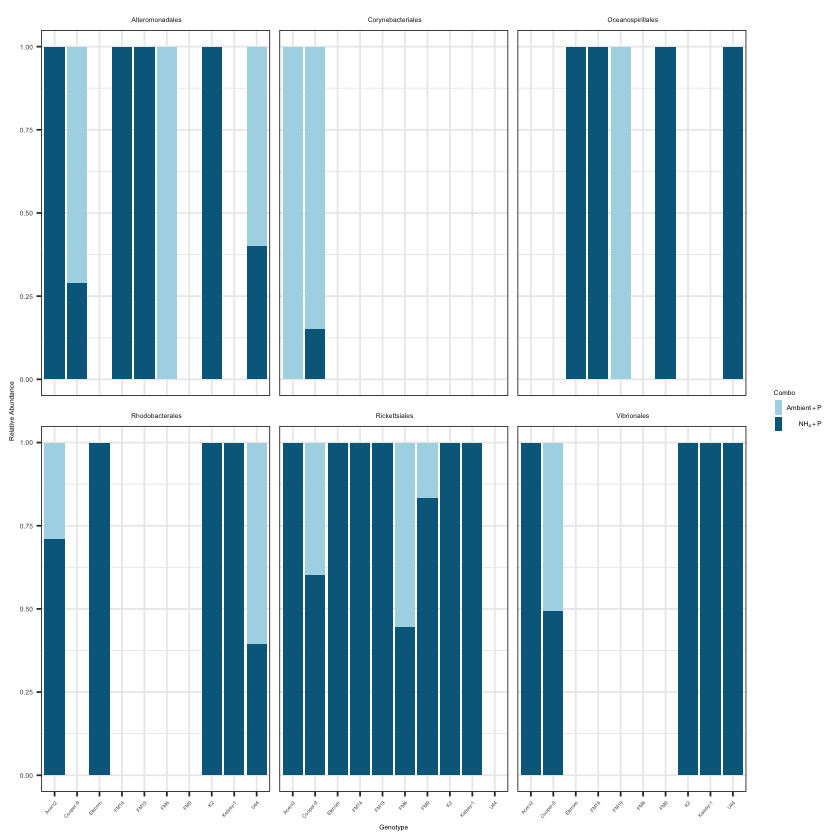

In [19]:
psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient_Placebo", "NH4_Placebo", 
                                                             "Ambient_Pathogen", "NH4_Pathogen"))

p2 = psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>%
filter(NH4_Susceptibility==c("Resistant", "Susceptible")) %>%


#mutate_all(funs(str_replace_all(.,"NH4", "Elevated NH4"))) %>% 
#filter(Phylum!=c(" p__Proteobacteria", " p__Actinobacteriota", " p__Spirochaetota", 
 #               " p__Campilobacterota")) %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%

ggplot(
       aes(x=Genotype, y= Abundance, fill=Combo)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(.~Nutrients,  scale="free_x") +
theme(strip.background = element_rect(fill="white")) +
guides(fill = guide_legend(keywidth = 0.4, keyheight =.70, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
#facet_grid(Order~., space ="free", scales="free", switch = "y") +
facet_wrap(Order~.) +
theme(strip.background = element_blank()) +
 #labs(fill = "Treatment") +
theme(axis.title.x = element_text(size = 4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
#theme(legend.position="top") +
theme(axis.title.y = element_text(size=4)) +
theme(axis.text.y = element_text(size=4)) +
scale_fill_manual(values=c("lightblue", "#00688B"
                          ), name = "Combo", labels=c(Ambient_Placebo=expression(paste(Ambient+P)),
                               NH4_Placebo=expression(paste(NH[4])+P))) +
theme(axis.text.x = element_text(angle = 50, hjust = 1, size=3)) +
theme(strip.text.x = element_text(size = 4)) +
ylab("Relative Abundance") +
xlab("Genotype") 

p2
psr_fill_melt %>%
  group_by(NH4_Susceptibility, Nutrients) %>%
  summarize(Paired = n()) %>%
head()




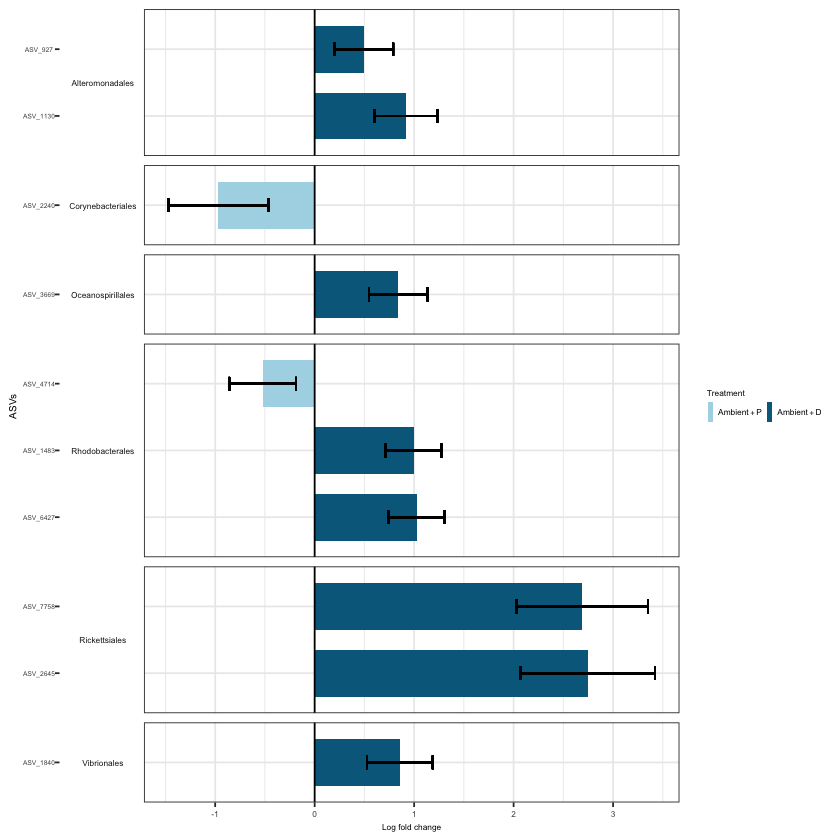

In [33]:

lab1 <- c(expression(Ambient+P),
          expression(Ambient+D), 
          expression(NH[4]+P),
          expression(NH[4]+D))



p1 = psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(HealthDL > 1 )  %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>% 
ggplot(
           aes(x = NutrientsNH4, y = reorder(ASVs, -NutrientsNH4),
               fill =group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(NutrientsNH4) - as.numeric(NutrientsNH4SD), 
xmax = as.numeric(NutrientsNH4) + as.numeric(NutrientsNH4SD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = "ASVs", x = "Log fold change", fill ="Combo") + 
  theme_bw() + 
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.90, ncol=2))  +
theme(axis.text.y = element_blank()) +
#facet_wrap(Genotype~., scales = "free_x") +

scale_fill_manual("Treatment", values=c("lightblue", "#00688B"), labels= lab1) +


theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =5)) +
theme(strip.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=5),
     
     ) +
theme(legend.title = element_text(size=5)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5) 

p1


Warning message:
“Removed 186 rows containing missing values (position_stack).”
Warning message:
“Removed 114 rows containing missing values (geom_bar).”


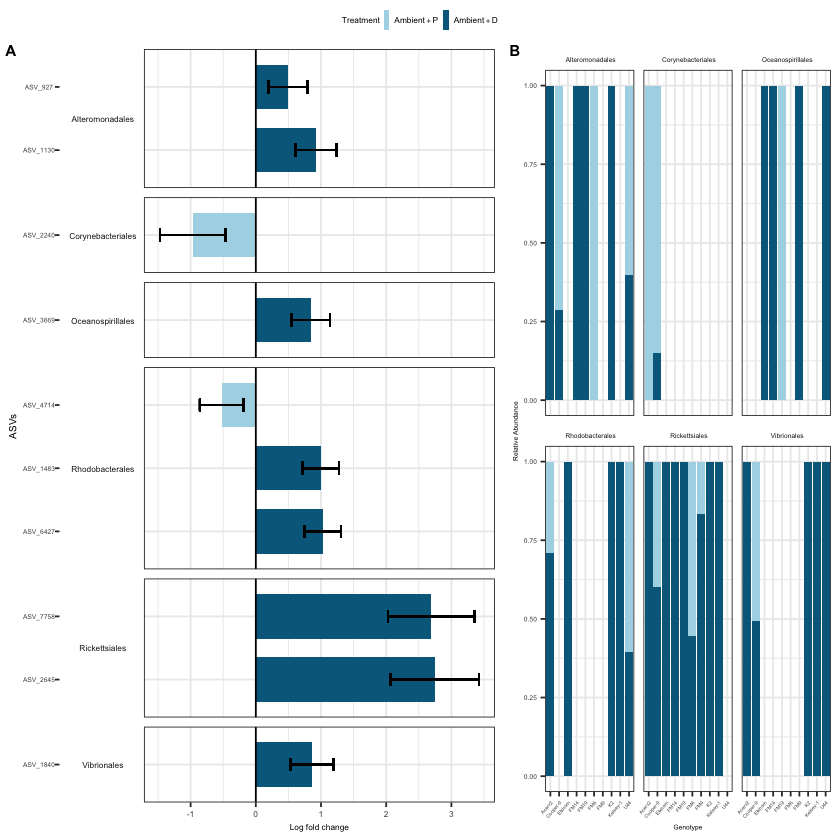

In [35]:
 ggpubr::ggarrange(p1, p2,
                  common.legend = TRUE,
                labels = c("A", "B"), font.label = list(size = 9), widths = c(1.5, 1))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_Nutrients.jpg", 
      width = 5.5, height = 4, units = "in", dpi=300)

In [117]:
out = ancombc(phyloseq = ps_placebo_fill , formula = "Nutrients", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Nutrients", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "Ambient", "NH4"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
select(taxon_id, Kingdom, Phylum, Class, Order, Family, Genus, Species) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired" & Diseased=="Placebo")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NutrientsNH4
,<chr>,<dbl>
1,a14b7162edeb7a30ddb2a46656539857,0.8731757
2,ce80d12fb367ffe011c2fb15bf9659bc,0.0000000
3,28fe0a00a6f5e062fba134618cc458e1,0.0000000
4,e23bbf8f65f14f451c2071e477ed2b58,0.0000000
5,58a75ecc587c36de8b4bbbac0c6efff2,0.0000000
6,8c4250b2fdfdd56db618eac4b7569d2d,0.0000000


[1] 74  2

,taxon_id,NutrientsNH4SD
,<chr>,<dbl>
1,a14b7162edeb7a30ddb2a46656539857,0.3380177
2,ce80d12fb367ffe011c2fb15bf9659bc,0.0000000
3,28fe0a00a6f5e062fba134618cc458e1,0.0000000
4,e23bbf8f65f14f451c2071e477ed2b58,0.0000000
5,58a75ecc587c36de8b4bbbac0c6efff2,0.0000000
6,8c4250b2fdfdd56db618eac4b7569d2d,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,a14b7162edeb7a30ddb2a46656539857,TRUE
2,43ae3cd56d175cf10a2d8a8dcadd5e7b,TRUE
3,75988391e4aca54b88d7669fabb11b96,TRUE
4,9d03eaed9d8a8b8d762b5af8640d1b32,TRUE
5,09f2b55ea4f56193699d46368ecbff40,TRUE
6,380e94062cd8f44ea50814193ad56225,TRUE


Joining, by = "taxon_id"


[1] 20  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

In [118]:
psr_fill_melt %>%
  group_by(Genotype, Nutrients) %>%
  summarize(Paired = n()) %>%
head()

`summarise()` has grouped output by 'Genotype'. You can override using the `.groups` argument.


Genotype,Nutrients,Paired
<chr>,<chr>,<int>
Acerv2,Ambient,120
Acerv2,NH4,120
Cooper-9,Ambient,80
Cooper-9,NH4,20
Elkhorn,Ambient,60
Elkhorn,NH4,80


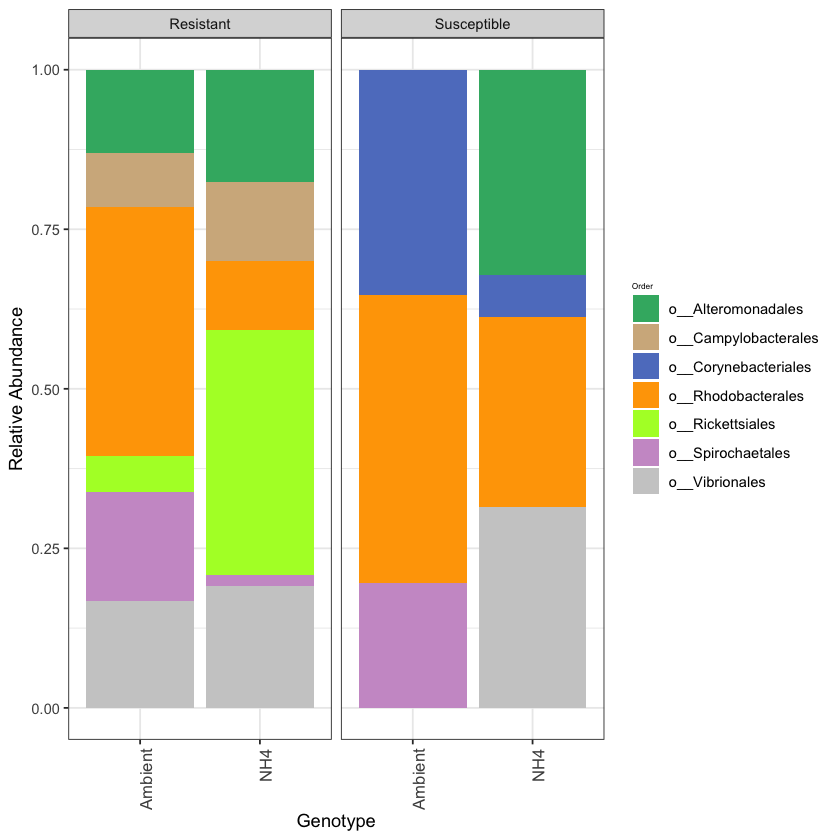

In [119]:
psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
filter(Abundance >= 0.0) %>%
filter(NH4_Susceptibility==c("Resistant", "Susceptible")) %>%
#filter(Phylum!=c(" p__Proteobacteria", " p__Actinobacteriota", " p__Spirochaetota", 
 #               " p__Campilobacterota")) %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
ggplot(
       aes(x=Nutrients, y= Abundance, fill=Order)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(.~NH4_Susceptibility,  scale="free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
#labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


In [120]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             